# Random Temporal Networks v1.0 #

In [2]:
import sys
sys.path.append("/home/luffy/Bureau/Random/Library/")
import RandTempNet as rn
import numpy as np
import matplotlib.pyplot as plt
import itertools as it

## Timeline shuffling (contacts) ##
We here present randomization techniques which shuffle the timelines of contact of links in the static network. All functions take a `link_timeline()` object as input, and return a `link_timeline()` object.

### Global contact shuffling on the aggregated network $\text{P}[\mathcal{L},p(\tau)]$: `P__L_ptau(lks_data,ti,tf,dt)` ###
This function shuffles contacts between all the links of a `link_timeline()` object `lks_data` while preserving their duration. The initial time `ti`, the final time `tf` and the time step duration `dt` are required.

In [2]:
lks_data = rn.read_link_timeline("Bureau/Random/Library/lks_InVS13.dat")
new_lks = rn.P__Gstat_delta(lks_data,0,60480,1)

Test of the modification of the activity timeline:

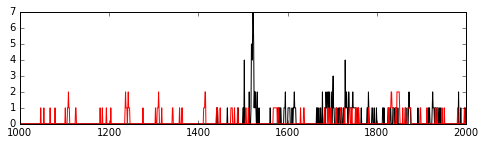

In [4]:
TL0 = rn.activity_timeline(rn.link_timeline_to_snapshot_sequence(lks_data,1,0,60480))
TL1 = rn.activity_timeline(rn.link_timeline_to_snapshot_sequence(new_lks,1,0,60480))

tmin = 1000
tmax = 2000

fig = plt.figure(figsize=(8,2))
x = range(len(TL0))[tmin:tmax]
plt.plot(x,TL0[tmin:tmax],'k-')
plt.plot(x,TL1[tmin:tmax],'r-')
plt.show()

Test of the preservation of the $p_\tau$:

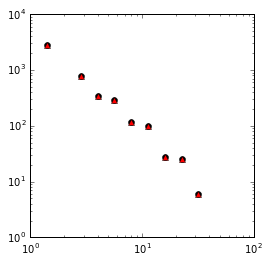

In [5]:
list_tau0 = rn.contact_durations(lks_data)
list_tau1 = rn.contact_durations(new_lks)
list_tau0 = list(it.chain(*list_tau0.values()))
list_tau1 = list(it.chain(*list_tau1.values()))

fig = plt.figure(figsize=(4,4))
tmax = max(list_tau0)
x = 2.**(np.arange(0,log(tmax)+1,0.5))
h0 = np.histogram(list_tau0,bins=x)
h1 = np.histogram(list_tau1,bins=x)
plt.loglog(x[1:],h0[0],'ko')
plt.loglog(x[1:],h1[0],'r^')
plt.show()

### Global contact shuffling with frequency preservation $\text{P}[\mathbf{n},p(\mathbf{t},\tau)]$: `P__n_pttau_E(lks_data,dt)` ###
This function shuffles contacts between existing links of a `link_timeline()` object `lks_data` but preserves the frequencies. The time step duration `dt` is required.

In [3]:
lks_data = rn.read_link_timeline("Bureau/Random/Library/lks_InVS13.dat")
new_lks = rn.P__n_ptau_E(lks_data,1)

Test of the preservation of the frequencies:

In [4]:
n0 = rn.number_of_contacts(lks_data)
n1 = rn.number_of_contacts(new_lks)
Test = np.array([n0[lk] == n1[lk] for lk in lks_data.links()])
Test.all()

True

Test of the preservation of the activity timeline:

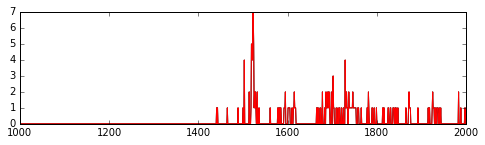

In [5]:
TL0 = rn.activity_timeline(rn.link_timeline_to_snapshot_sequence(lks_data,1,0,60480))
TL1 = rn.activity_timeline(rn.link_timeline_to_snapshot_sequence(new_lks,1,0,60480))

tmin = 1000
tmax = 2000

fig = plt.figure(figsize=(8,2))
x = range(len(TL0))[tmin:tmax]
plt.plot(x,TL0[tmin:tmax],'k-')
plt.plot(x,TL1[tmin:tmax],'r-')
plt.show()

### Global contact shuffling $\text{P}[\mathcal{L},p(\mathbf{t},\tau)]$: `P__L_pttau(lks_data,dt)` ###
This function shuffles contacts between existing links of a `link_timeline()` object `lks_data`. The time step duration `dt` is required.

In [6]:
lks_data = rn.read_link_timeline("Bureau/Random/Library/lks_InVS13.dat")
new_lks = rn.P__L_pttau(lks_data,1)

Test of the preservation of the $p_\tau$:

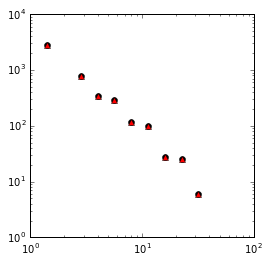

In [7]:
list_tau0 = rn.contact_durations(lks_data)
list_tau1 = rn.contact_durations(new_lks)
list_tau0 = list(it.chain(*list_tau0.values()))
list_tau1 = list(it.chain(*list_tau1.values()))

fig = plt.figure(figsize=(4,4))
tmax = max(list_tau0)
x = 2.**(np.arange(0,log(tmax)+1,0.5))
h0 = np.histogram(list_tau0,bins=x)
h1 = np.histogram(list_tau1,bins=x)
plt.loglog(x[1:],h0[0],'ko')
plt.loglog(x[1:],h1[0],'r^')
plt.show()

Test of the preservation of the activity timeline:

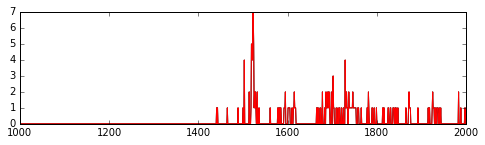

In [8]:
TL0 = rn.activity_timeline(rn.link_timeline_to_snapshot_sequence(lks_data,1,0,60480))
TL1 = rn.activity_timeline(rn.link_timeline_to_snapshot_sequence(new_lks,1,0,60480))

tmin = 1000
tmax = 2000

fig = plt.figure(figsize=(8,2))
x = range(len(TL0))[tmin:tmax]
plt.plot(x,TL0[tmin:tmax],'k-')
plt.plot(x,TL1[tmin:tmax],'r-')
plt.show()

Test of the modification of the weights distribution:

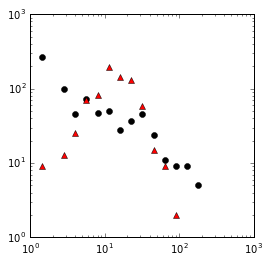

In [9]:
list_w0 = rn.weights(lks_data).values()
list_w1 = rn.weights(new_lks).values()

fig = plt.figure(figsize=(4,4))
wmax = max(list_w0)
x = 2.**(np.arange(0,log(wmax)+1,0.5))
h0 = np.histogram(list_w0,bins=x)
h1 = np.histogram(list_w1,bins=x)
plt.loglog(x[1:],h0[0],'ko')
plt.loglog(x[1:],h1[0],'r^')
plt.show()